# Импорт и загрузка метаданных

В этом блоке мы:

1. **Импортируем библиотеки**  
   - `pandas` для работы с табличными данными,  
   - `seaborn` и `matplotlib.pyplot` для последующей визуализации.

2. **Загружаем CSV-файл с метаданными треков**  
   - `tracks.csv` содержит подробную информацию о каждом аудио-треке (жанр, исполнитель, длительность и т. д.).  
   - При чтении указываем `header=[0,1]`, так как файл имеет многоуровневые заголовки (level-0 и level-1).  
   - `index_col=0` задаёт первый столбец (ID трека) в качестве индекса DataFrame.

3. **Выделяем столбец жанра**  
   - Подполе `("track", "genre_top")` соответствует основному жанру каждого трека.  
   - Сохраняем его в переменную `genre_col` для удобства.

4. **Выводим базовую статистику по жанрам**  
   - Общее число треков в выборке (`len(genre_col)`).  
   - Число уникальных жанров (`genre_col.nunique()`).  
   - Топ-10 самых частых жанров с указанием количества треков в каждом (`value_counts().head(10)`).

Этот анализ даёт представление о том, как распределены жанры в нашем наборе данных и позволит в дальнейшем делать выборки и визуализации по наиболее популярным направлениям музыки.


In [14]:
# ╔══════════════════════════════════════════╗
# ║  Cell 1 – импорт и загрузка метаданных   ║
# ╚══════════════════════════════════════════╝
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

TRACK_CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

tracks = pd.read_csv(TRACK_CSV, header=[0, 1], index_col=0)
genre_col = tracks[("track", "genre_top")]

print("Всего треков в выборке:", len(genre_col))
print("Уникальных жанров:", genre_col.nunique())
print()
print("Топ-10 жанров по количеству треков:")
print(genre_col.value_counts().head(10))


Всего треков в выборке: 106574
Уникальных жанров: 16

Топ-10 жанров по количеству треков:
(track, genre_top)
Rock             14182
Experimental     10608
Electronic        9372
Hip-Hop           3552
Folk              2803
Pop               2332
Instrumental      2079
International     1389
Classical         1230
Jazz               571
Name: count, dtype: int64


## Гистограмма распределения треков по жанрам

В этом блоке мы строим столбчатую диаграмму, чтобы наглядно увидеть, как часто встречаются разные жанры в нашем наборе данных:

1. **Создаём фигуру нужного размера**  
   - `plt.figure(figsize=(10,5))` задаёт ширину и высоту графика в дюймах.

2. **Вычисляем частоты жанров**  
   - `genre_col.value_counts()` возвращает серию, где индекс — название жанра, а значение — количество треков этого жанра.

3. **Строим столбчатую диаграмму**  
   - `plot(kind="bar", color="steelblue")` рисует столбцы с заданным цветом.

4. **Добавляем оформление**  
   - `plt.title` задаёт заголовок графика.  
   - `plt.ylabel` подписывает ось Y.  
   - `plt.xticks(rotation=45, ha="right")` поворачивает подписи жанров на 45° для удобного чтения и выравнивает их по правому краю.

5. **Отображаем результат**  
   - `plt.show()` выводит готовый график.

Такая визуализация помогает быстро определить наиболее и наименее популярные жанры и понять, на какие направления музыки стоит обратить внимание при дальнейшем анализе.


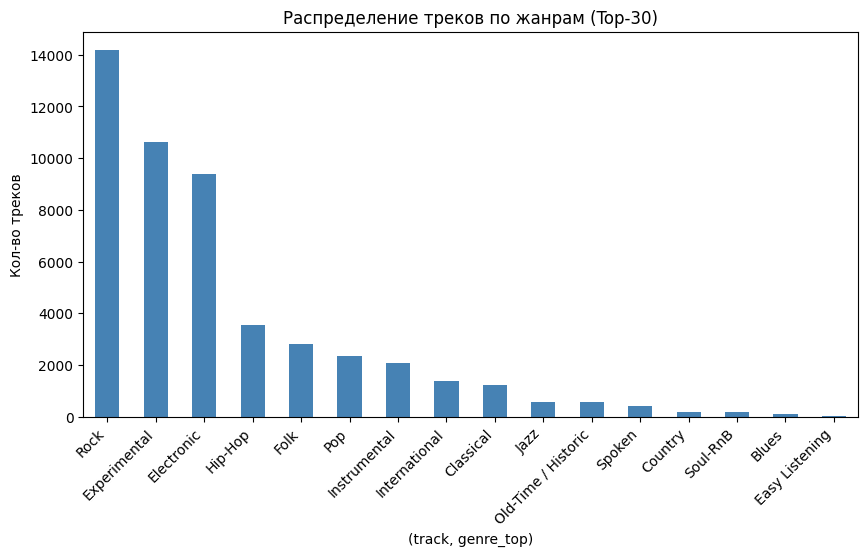

In [15]:
# ╔══════════════════════════════════════════╗
# ║  Cell 2 – Гистограмма распределения     ║
# ╚══════════════════════════════════════════╝
plt.figure(figsize=(10,5))
genre_col.value_counts().plot(kind="bar", color="steelblue")
plt.title("Распределение треков по жанрам (Top-30)")
plt.ylabel("Кол-во треков")
plt.xticks(rotation=45, ha="right")
plt.show()


## Список доступных полей в секции `track` файла `tracks.csv`

В этом блоке мы определяем, какие подполя есть у секции `"track"` в нашем CSV-файле:

1. **Читаем только заголовок файла**  
   - `pd.read_csv(..., header=[0, 1], nrows=0)` загружает только первую строку (заголовок) с двумя уровнями вложенности (MultiIndex).

2. **Извлекаем названия столбцов**  
   - `hdr = ... .columns` получает объект `MultiIndex`, содержащий пары `(уровень0, уровень1)`.

3. **Фильтруем подполя секции `track`**  
   - `[c[1] for c in hdr if c[0] == "track"]` оставляет только те колонки, у которых первый уровень равен `"track"`, и извлекает их имена второго уровня.

4. **Выводим первые 25 полей**  
   - `print(..., track_cols[:25], "…")` показывает, какие подполя доступны, чтобы понять, какие данные о треке можно анализировать.

Этот подход позволяет быстро ознакомиться со структурой метаданных треков и решить, какие из них будут полезны для дальнейшего анализа.


In [16]:
import pandas as pd
CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

hdr = pd.read_csv(CSV, header=[0, 1], nrows=0).columns
track_cols = [c[1] for c in hdr if c[0] == "track"]
print("track-подполя:", track_cols[:25], "…")


track-подполя: ['bit_rate', 'comments', 'composer', 'date_created', 'date_recorded', 'duration', 'favorites', 'genre_top', 'genres', 'genres_all', 'information', 'interest', 'language_code', 'license', 'listens', 'lyricist', 'number', 'publisher', 'tags', 'title'] …


## Анализ длительности и битрейта треков по жанрам

В этом блоке кода мы готовим и визуализируем два ключевых аспекта аудиоданных — длительность и битрейт — в разбивке по жанрам:

1. **Загрузка полного датасета**  
   Читаем файл `tracks.csv` с мультуровневым заголовком (`header=[0,1]`) и индексируем по идентификатору трека. Параметр `low_memory=False` отключает оптимизации по памяти, чтобы корректно загрузить все столбцы. Для FMA-large это около 55 МБ.

2. **Выбор нужных подполей секции `track`**  
   - Задаём список интересующих нас подполь: `need = ["genre_top", "duration", "bit_rate"]`.  
   - При помощи `df.loc[:, ("track", need)]` выбираем только эти столбцы из уровня `"track"`.  
   - `droplevel(0)` убирает верхний уровень `"track"`, оставляя простые названия столбцов.

3. **Переименование и фильтрация данных**  
   - Переименовываем колонку `"genre_top"` в более краткое `"genre"`.  
   - Удаляем все строки, где отсутствуют жанр или битрейт, так как они не пригодны для анализа.

4. **Box-plot распределения длительности**  
   - Переводим длительность из секунд в минуты (`duration / 60`).  
   - Строим `sns.boxplot` без выбросов (`showfliers=False`), чтобы сравнить медианы и разброс длительностей разных жанров.

5. **Violin-plot распределения битрейта**  
   - Строим `sns.violinplot` с отображением квартилей (`inner="quartile"`), чтобы увидеть форму распределения битрейта в каждом жанре.

Обе визуализации помогают оценить, насколько характеристики треков (длительность и качество аудио) различаются между жанрами, что важно при понимании потребительских предпочтений и корректировке рекомендаций. 


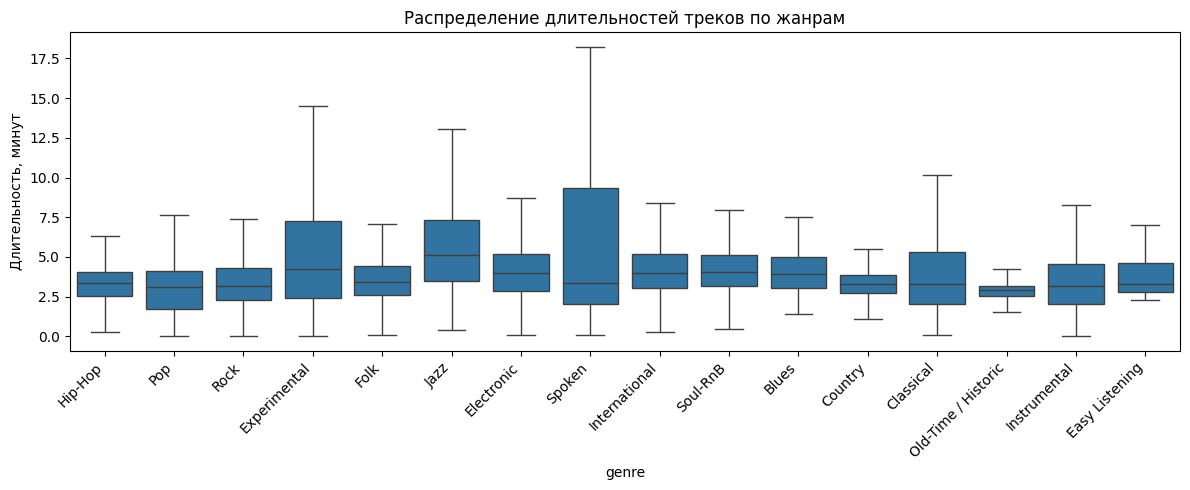

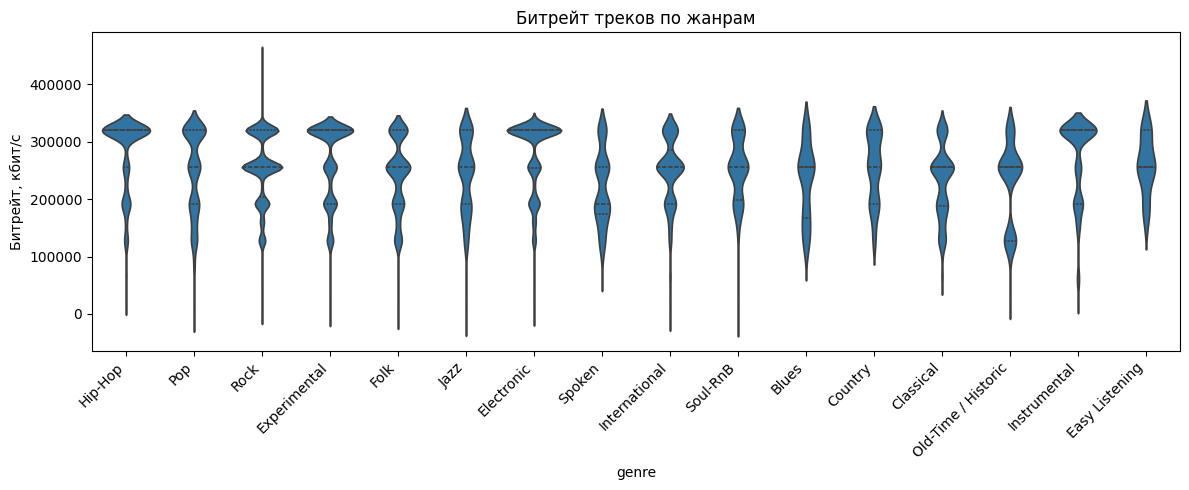

In [17]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

# 1. читаем файл целиком (≈ 55 МБ для fma_large)  ────────────────────
df = pd.read_csv(CSV, header=[0, 1], index_col=0, low_memory=False)

# 2. берём только под-поля track/… которые нужны ----------------------
need = ["genre_top", "duration", "bit_rate"]          # ← заменяйте/добавляйте здесь
tracks = df.loc[:, ("track", need)].copy()            # выбираем столбцы
tracks.columns = tracks.columns.droplevel(0)          # genre_top → genre_top …

# 3. переименуем покороче и отфильтруем пропуски ----------------------
tracks = (
    tracks.rename(columns={"genre_top": "genre"})     # проще имя
          .dropna(subset=["genre", "bit_rate"])       # убираем пустые
)

# 4️⃣ box-plot длительностей (в минутах) ------------------------------
plt.figure(figsize=(12, 5))
sns.boxplot(data=tracks, x="genre", y=tracks["duration"] / 60, showfliers=False)
plt.ylabel("Длительность, минут")
plt.title("Распределение длительностей треков по жанрам")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 5️⃣ violin-plot битрейта -------------------------------------------
plt.figure(figsize=(12, 5))
sns.violinplot(data=tracks, x="genre", y="bit_rate", inner="quartile")
plt.ylabel("Битрейт, кбит/с")
plt.title("Битрейт треков по жанрам")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## Загрузка и подготовка данных

В этом разделе мы считываем полный набор метаданных из файла `tracks.csv` с мультуровневым заголовком, а затем оставляем только интересующие нас столбцы:
- **Категориальные**: `genre_top` (жанр трека)  
- **Числовые**: `duration` (продолжительность в секундах), `bit_rate` (битрейт в кбит/с), `favorites` (число добавлений в избранное), `interest` (оценка интереса пользователя), `listens` (число прослушиваний)  

Далее:
1. «Сплющиваем» уровень `track`, чтобы получить плоские имена столбцов  
2. Переименовываем `genre_top` в более короткое `genre`  
3. Убираем треки без указанного жанра, так как они не пригодны для дальнейшего анализа  


In [18]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
CSV = "/home/ivan/PycharmProjects/MPr/audio_samples/fma_metadata/tracks.csv"

df = pd.read_csv(CSV, header=[0, 1], index_col=0, low_memory=False)

# ── нужные столбцы ──────────────────────────────────────────────────
need_cat = ["genre_top"]                # категориальные
need_num = ["duration", "bit_rate", "favorites", "interest", "listens"]

tracks = df.loc[:, ("track", need_cat + need_num)].copy()
tracks.columns = tracks.columns.droplevel(0)
tracks = tracks.rename(columns={"genre_top": "genre"})
tracks = tracks.dropna(subset=["genre"])         # оставим только треки с жанром

# **Вывод после загрузки и фильтрации данных**
print(f"Всего треков после фильтрации по жанру: {len(tracks)}")
print("Пример первых 5 записей:")
print(tracks.head())
print("\nСтатистика по числовым столбцам:")
print(tracks[need_num].describe().round(2))
print("-" * 60)


Всего треков после фильтрации по жанру: 49598
Пример первых 5 записей:
            genre  duration  bit_rate  favorites  interest  listens
track_id                                                           
2         Hip-Hop       168    256000          2      4656     1293
3         Hip-Hop       237    256000          1      1470      514
5         Hip-Hop       206    256000          6      1933     1151
10            Pop       161    192000        178     54881    50135
134       Hip-Hop       207    256000          3      1126      943

Статистика по числовым столбцам:
       duration   bit_rate  favorites    interest    listens
count  49598.00   49598.00   49598.00    49598.00   49598.00
mean     268.63  260278.66       2.38     2523.91    1586.33
std      284.33   65663.86      11.15    19802.85    6039.95
min        0.00      -1.00       0.00        2.00       1.00
25%      146.00  192000.00       0.00      456.00     212.00
50%      211.00  256000.00       1.00      938.00    

## Распределение числа треков по жанрам

Здесь мы визуализируем, сколько треков каждого жанра содержится в датасете:
- Используем `sns.countplot` для подсчёта количества записей по категориям  
- Сортируем столбцы по убыванию числа треков  
- Поворачиваем подписи жанров для удобства чтения  

Такая гистограмма помогает понять, какие жанры доминируют в коллекции и какие представлены слабо.

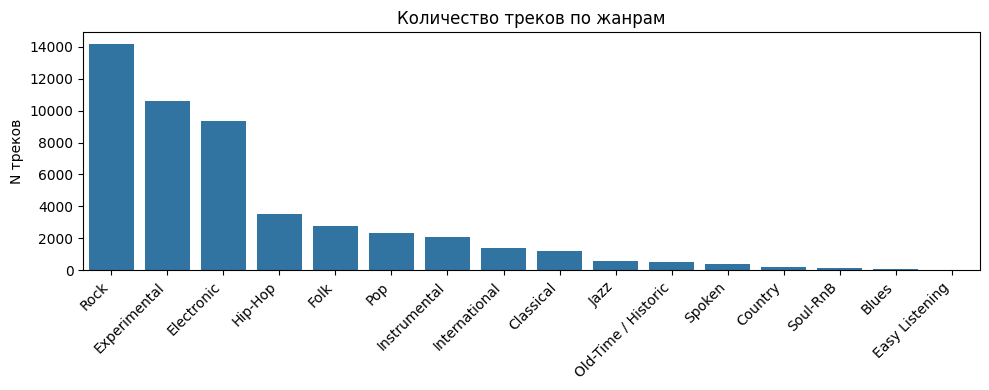

Top-10 жанров по числу треков:
genre
Rock             14182
Experimental     10608
Electronic        9372
Hip-Hop           3552
Folk              2803
Pop               2332
Instrumental      2079
International     1389
Classical         1230
Jazz               571
Name: count, dtype: int64

Малым жанрам (<100 треков) соответствует категории:
['Easy Listening']
------------------------------------------------------------


In [19]:
plt.figure(figsize=(10,4))
order = tracks["genre"].value_counts().index
sns.countplot(data=tracks, x="genre", order=order)
plt.title("Количество треков по жанрам")
plt.xticks(rotation=45, ha="right")
plt.ylabel("N треков"); plt.xlabel("")
plt.tight_layout(); plt.show()

# **Вывод распределения по жанрам**
vc = tracks["genre"].value_counts()
print("Top-10 жанров по числу треков:")
print(vc.head(10))
print("\nМалым жанрам (<100 треков) соответствует категории:")
print(list(vc[vc < 100].index))
print("-" * 60)

## Взаимосвязь длительности и битрейта

На этом scatter-плоте мы анализируем, как связаны между собой две важные характеристики треков:
- **Ось X**: длительность трека в минутах (`duration / 60`)  
- **Ось Y**: битрейт трека в кбит/с (`bit_rate`)  
- Цветом (`hue`) отмечены разные жанры  
- Полупрозрачные точки (`alpha=0.35`) позволяют увидеть плотность  

Этот график показывает, есть ли зависимость между качеством аудио (битрейтом) и длиной трека, а также позволяет заметить жанровые особенности.



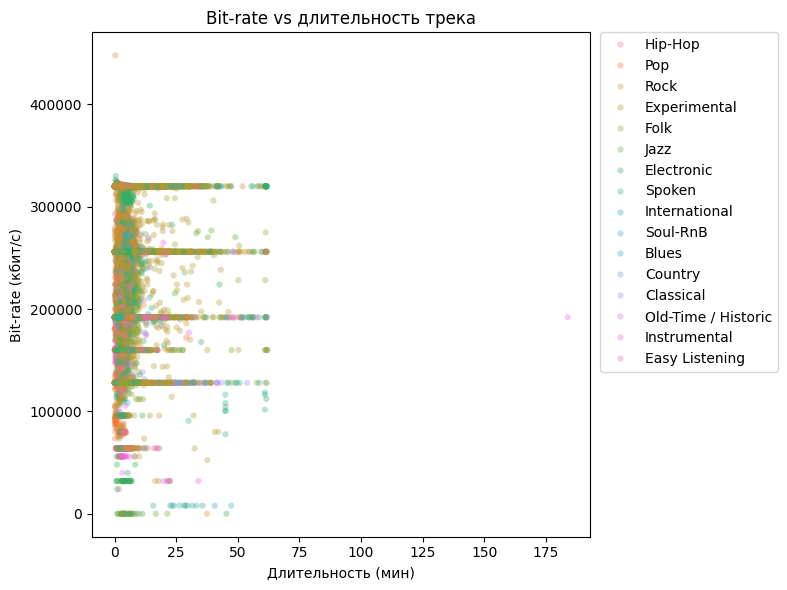

Корреляция duration ↔ bit_rate: 0.01
------------------------------------------------------------


In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tracks, x=tracks["duration"]/60, y="bit_rate",
                hue="genre", alpha=0.35, s=20, linewidth=0)
plt.xlabel("Длительность (мин)")
plt.ylabel("Bit-rate (кбит/с)")
plt.title("Bit-rate vs длительность трека")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)
plt.tight_layout(); plt.show()

# **Вывод корреляции между длительностью и битрейтом**
corr_db = tracks["duration"].corr(tracks["bit_rate"])
print(f"Корреляция duration ↔ bit_rate: {corr_db:.2f}")
print("-" * 60)

---

## Добавления в избранное по жанрам

Если в данных присутствует колонка `favorites`, здесь строится box-plot:
- **Ось X**: жанры  
- **Ось Y**: число добавлений в «избранное»  
- Без отображения выбросов (`showfliers=False`) для лучшей читаемости  

Этот график демонстрирует, в каких жанрах треки чаще всего попадают в избранное пользователей, что отражает популярность и «вовлечённость».

---

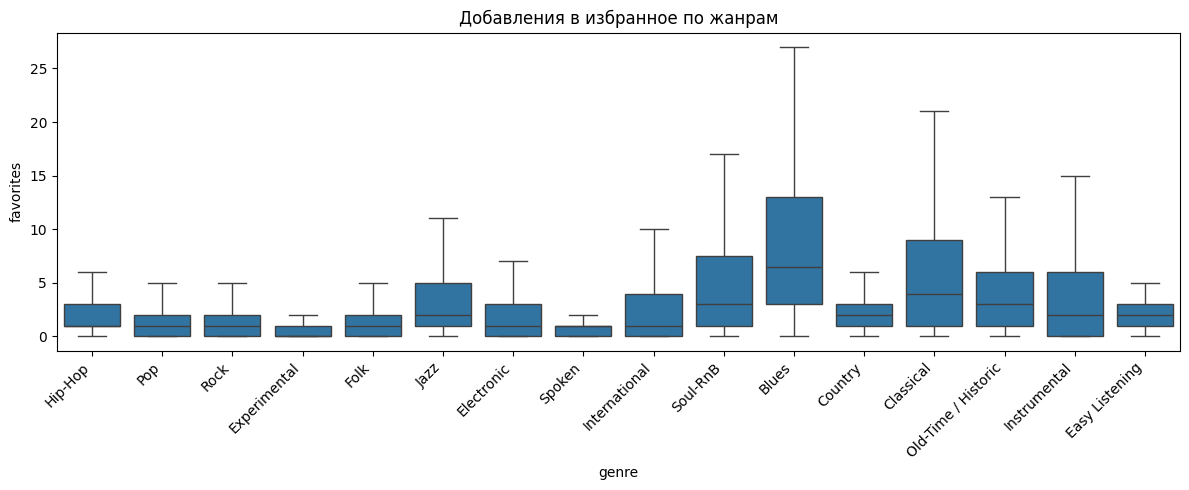

Статистика по добавлениям в избранное (по жанрам):
                     count   mean  median
genre                                    
Blues                  110  16.95     6.5
Classical             1230   8.07     4.0
Soul-RnB               175   7.75     3.0
Jazz                   571   6.15     2.0
Old-Time / Historic    554   5.57     3.0
------------------------------------------------------------


In [21]:
if "favorites" in tracks.columns and tracks["favorites"].notna().any():
    plt.figure(figsize=(12,5))
    sns.boxplot(data=tracks, x="genre", y="favorites", showfliers=False)
    plt.title("Добавления в избранное по жанрам")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

    # **Вывод основных статистик 'favorites'**
    fav_stats = tracks.groupby("genre")["favorites"].agg(["count","mean","median"]).round(2)
    print("Статистика по добавлениям в избранное (по жанрам):")
    print(fav_stats.sort_values("mean", ascending=False).head(5))
else:
    print("Колонка 'favorites' отсутствует или пустая.")
print("-" * 60)


## Корреляционная тепловая карта числовых признаков

В этом шаге мы рассчитываем и визуализируем матрицу попарных корреляций между числовыми столбцами:
- `duration`, `bit_rate`, `favorites`, `interest`, `listens`  
- Используем `sns.heatmap` с аннотацией и цветовой картой `RdBu_r`, центрированной на нуле  

Тепловая карта позволяет быстро определить сильные и слабые связи между признаками, например, растёт ли число прослушиваний вместе с длительностью или битрейтом.

---

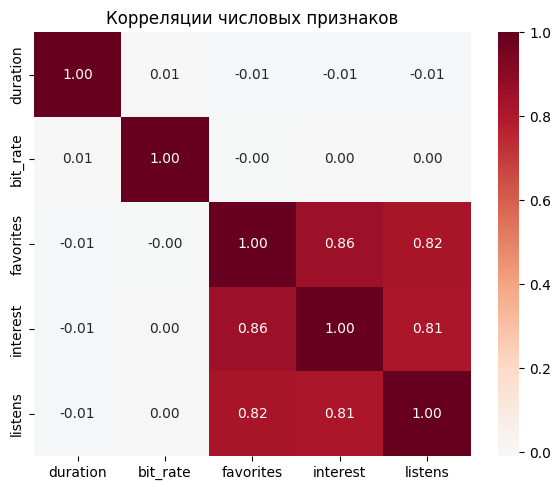

Матрица попарных корреляций:
           duration  bit_rate  favorites  interest  listens
duration       1.00      0.01      -0.01     -0.01    -0.01
bit_rate       0.01      1.00      -0.00      0.00     0.00
favorites     -0.01     -0.00       1.00      0.86     0.82
interest      -0.01      0.00       0.86      1.00     0.81
listens       -0.01      0.00       0.82      0.81     1.00
------------------------------------------------------------


In [22]:
corr = tracks[need_num].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.title("Корреляции числовых признаков")
plt.tight_layout(); plt.show()

# **Вывод матрицы корреляций**
print("Матрица попарных корреляций:")
print(corr.round(2))
print("-" * 60)

---

## Парный график (PairPlot) небольшой выборки

Для более подробного мультивариантного анализа строим `pairplot` по случайной выборке до 2000 треков:
- Оси: `duration`, `bit_rate`, `favorites`, `interest`  
- Цветовая группировка по жанру  
- Отображаем только нижний треугольник (`corner=True`) и задаём прозрачность точек (`alpha=0.4`)  

Парный график помогает визуально оценить распределение и взаимосвязи одновременно между всеми парами признаков, а также увидеть, отличаются ли жанры в многомерном пространстве признаков.

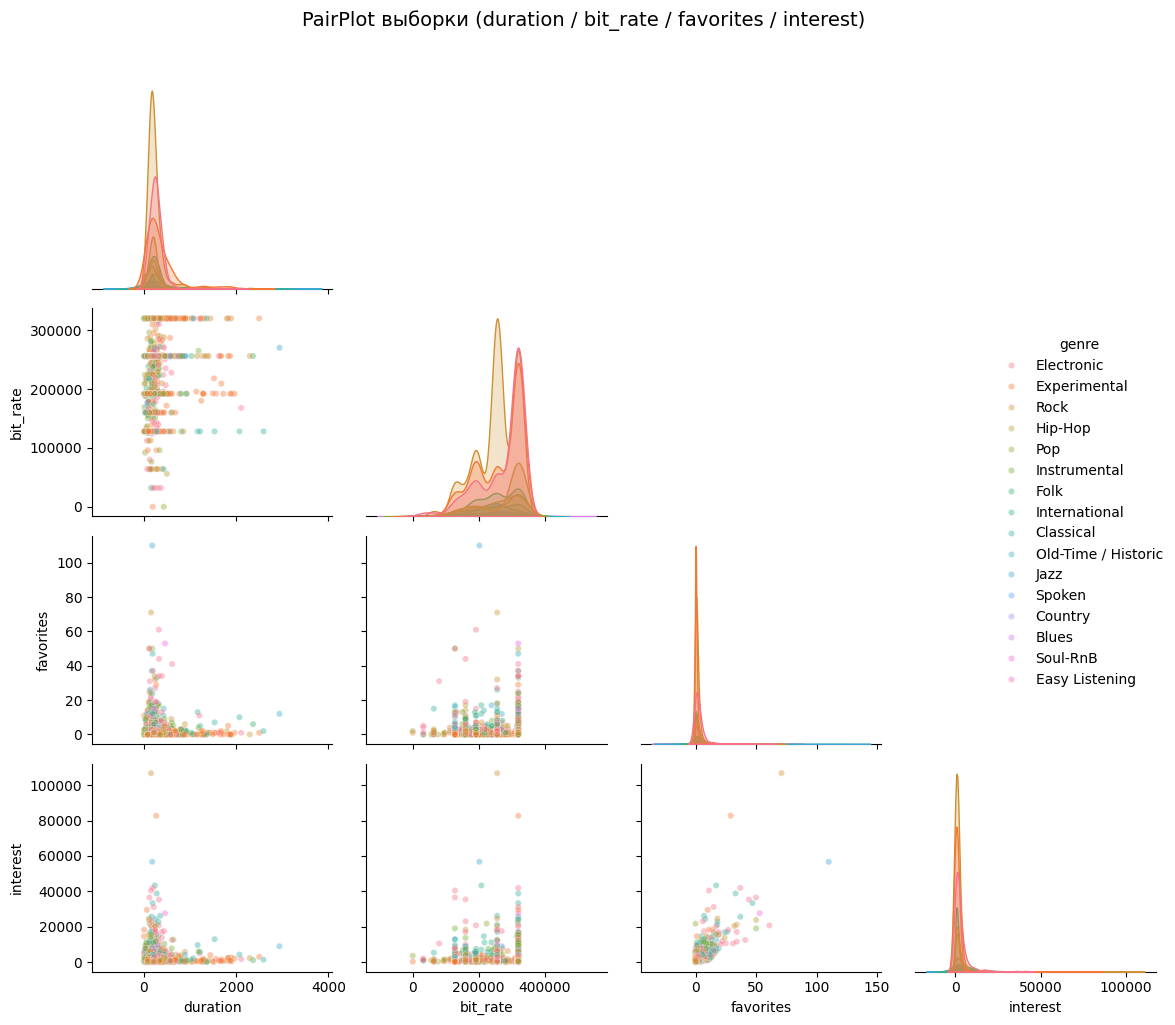

Использовано 2000 случайных треков для PairPlot.
Отображаемые признаки: ['duration', 'bit_rate', 'favorites', 'interest']


In [23]:
sample = tracks.sample(n=min(2000, len(tracks)), random_state=42)
sns.pairplot(sample, vars=["duration", "bit_rate", "favorites", "interest"],
             hue="genre", corner=True, plot_kws=dict(alpha=.4, s=20))
plt.suptitle("PairPlot выборки (duration / bit_rate / favorites / interest)",
             y=1.02, fontsize=14)
plt.tight_layout(); plt.show()

# **Вывод числа точек в PairPlot и отображаемых признаков**
print(f"Использовано {len(sample)} случайных треков для PairPlot.")
print("Отображаемые признаки:", ["duration","bit_rate","favorites","interest"])